In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/phishing.csv")
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [4]:
df.drop(columns = ['id'] , inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int64  
 1   SubdomainLevel                      10000 non-null  int64  
 2   PathLevel                           10000 non-null  int64  
 3   UrlLength                           10000 non-null  int64  
 4   NumDash                             10000 non-null  int64  
 5   NumDashInHostname                   10000 non-null  int64  
 6   AtSymbol                            10000 non-null  int64  
 7   TildeSymbol                         10000 non-null  int64  
 8   NumUnderscore                       10000 non-null  int64  
 9   NumPercent                          10000 non-null  int64  
 10  NumQueryComponents                  10000 non-null  int64  
 11  NumAmpersand                        10000 

In [6]:
df.describe()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,19.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0
NumSensitiveWords                     0


In [8]:
df.duplicated().sum()

419

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(9581, 49)

In [13]:
## checking balance / imbalance data
target_summary = df['CLASS_LABEL'].value_counts(normalize=True)*100
target_summary

0    52.14487
1    47.85513
Name: CLASS_LABEL, dtype: float64

<AxesSubplot:ylabel='CLASS_LABEL'>

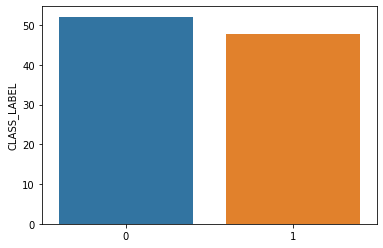

In [14]:
sns.barplot(target_summary.index , target_summary)

### feature selection

In [15]:
def plot_correlation(data , startIdx , endIdx):
    temp_feat = data.iloc[: , startIdx:endIdx]
    y = df['CLASS_LABEL']
    
    temp_df = pd.concat([temp_feat , y ], axis = True)
    
    plt.figure(figsize = (9,5))
    sns.heatmap(temp_df.corr() , annot=True, fmt='.2f')
    plt.show()

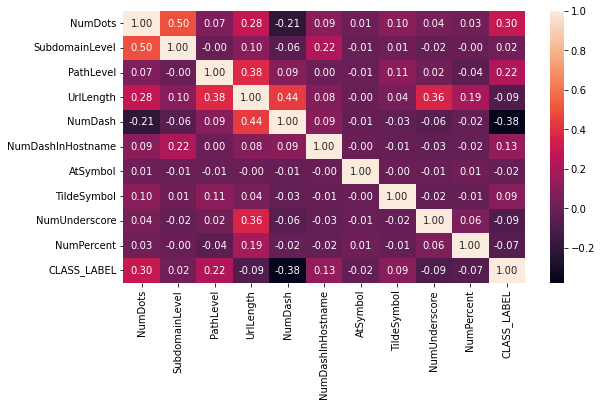

In [16]:
## correlation between starting 10 variables
plot_correlation(df,0,10)

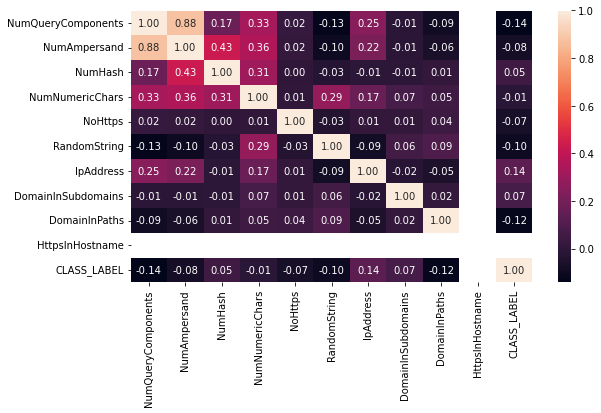

In [17]:
## correlation between starting 10-20 variables
plot_correlation(df,10,20)

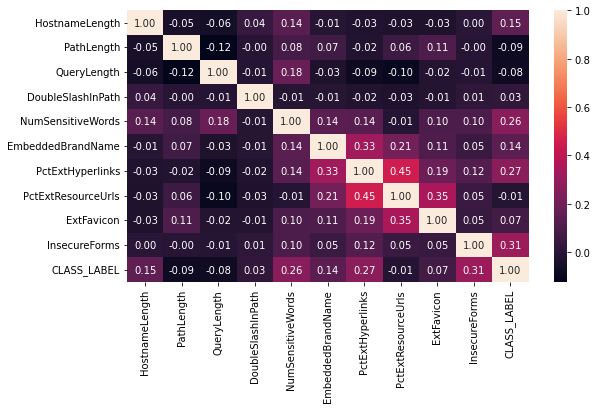

In [18]:
## correlation between starting 20-30 variables
plot_correlation(df,20,30)

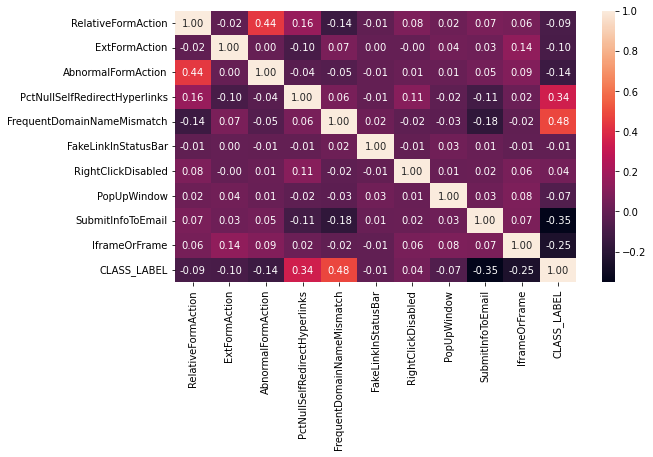

In [20]:
## correlation between starting 30-40 variables
plot_correlation(df,30,40)

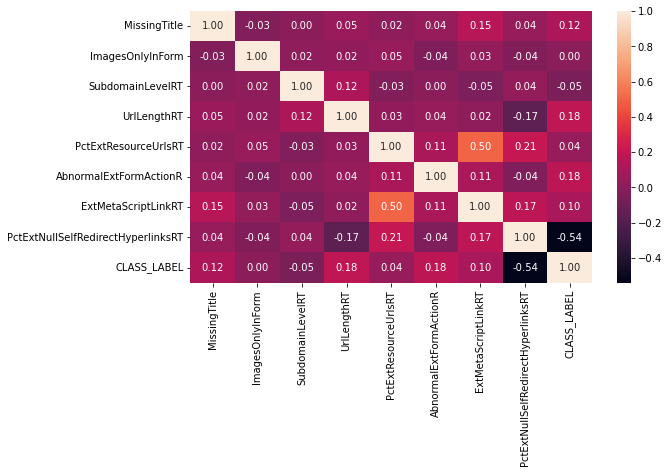

In [19]:
## correlation between starting 40-50 variables
plot_correlation(df,40,48)

In [21]:
corr = df.corr()
corr

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
NumDots,1.000000,0.499645,0.070382,0.281173,-0.205321,0.092699,0.011985,0.098076,0.042746,0.025179,...,-0.120186,0.050674,-0.008395,-0.325075,-0.148687,0.043420,0.032709,0.033482,-0.149584,0.296978
SubdomainLevel,0.499645,1.000000,-0.003598,0.096348,-0.056530,0.221762,-0.005835,0.007665,-0.017766,-0.003973,...,-0.003197,0.034438,-0.004683,-0.644643,-0.075567,0.046394,-0.038298,0.079130,-0.003529,0.024308
PathLevel,0.070382,-0.003598,1.000000,0.381193,0.090186,0.003268,-0.005739,0.107636,0.019494,-0.042768,...,-0.007093,-0.022025,0.005071,-0.016508,-0.393307,-0.010664,0.034542,0.060373,-0.089540,0.221077
UrlLength,0.281173,0.096348,0.381193,1.000000,0.437941,0.082297,-0.003384,0.041372,0.358551,0.192076,...,0.026122,-0.046599,-0.030009,-0.132472,-0.803129,-0.001936,-0.030096,-0.009167,0.149695,-0.088229
NumDash,-0.205321,-0.056530,0.090186,0.437941,1.000000,0.093502,-0.010371,-0.027876,-0.055222,-0.018635,...,0.224213,-0.062640,-0.003448,-0.015262,-0.470578,-0.139195,-0.084411,-0.128356,0.188722,-0.375612
NumDashInHostname,0.092699,0.221762,0.003268,0.082297,0.093502,1.000000,-0.004331,-0.013303,-0.028155,-0.019646,...,-0.005912,-0.007993,-0.001741,-0.310202,-0.068449,0.060479,0.028937,0.040743,-0.077451,0.132974
AtSymbol,0.011985,-0.005835,-0.005739,-0.003384,-0.010371,-0.004331,1.000000,-0.001959,-0.005220,0.007158,...,-0.012671,-0.003176,-0.003127,0.002822,-0.007715,-0.006776,-0.003993,0.011826,0.013136,-0.016954
TildeSymbol,0.098076,0.007665,0.107636,0.041372,-0.027876,-0.013303,-0.001959,1.000000,-0.020884,-0.013339,...,-0.034906,-0.008892,-0.019559,0.013416,-0.027720,0.017567,0.019519,0.051965,-0.006208,0.094546
NumUnderscore,0.042746,-0.017766,0.019494,0.358551,-0.055222,-0.028155,-0.005220,-0.020884,1.000000,0.060900,...,-0.010332,-0.018039,-0.019911,-0.006460,-0.262715,0.019711,-0.051203,-0.045232,0.094327,-0.090962
NumPercent,0.025179,-0.003973,-0.042768,0.192076,-0.018635,-0.019646,0.007158,-0.013339,0.060900,1.000000,...,-0.021327,-0.011226,-0.006895,0.003883,-0.129742,0.022464,-0.000362,0.019561,0.033183,-0.065738


In [22]:
corr_df = corr.iloc[: , -1].reset_index()
corr_df

,index,CLASS_LABEL
0,NumDots,0.296978
1,SubdomainLevel,0.024308
2,PathLevel,0.221077
3,UrlLength,-0.088229
4,NumDash,-0.375612
5,NumDashInHostname,0.132974
6,AtSymbol,-0.016954
7,TildeSymbol,0.094546
8,NumUnderscore,-0.090962
9,NumPercent,-0.065738


In [23]:
sorted_corr_df = corr_df.sort_values(by = 'CLASS_LABEL' , ascending=False)
sorted_corr_df

,index,CLASS_LABEL
48,CLASS_LABEL,1.000000
34,FrequentDomainNameMismatch,0.477624
33,PctNullSelfRedirectHyperlinks,0.339712
29,InsecureForms,0.312671
0,NumDots,0.296978
26,PctExtHyperlinks,0.265735
24,NumSensitiveWords,0.262154
2,PathLevel,0.221077
43,UrlLengthRT,0.183383
45,AbnormalExtFormActionR,0.177346


In [32]:
sorted_corr_df = sorted_corr_df.iloc[1:48].reset_index(drop=True)

In [33]:
sorted_corr_df.head()

,index,CLASS_LABEL
0,FrequentDomainNameMismatch,0.477624
1,PctNullSelfRedirectHyperlinks,0.339712
2,InsecureForms,0.312671
3,NumDots,0.296978
4,PctExtHyperlinks,0.265735


In [37]:
features_list = sorted_corr_df['index'].tolist()
features_list

['FrequentDomainNameMismatch',
 'PctNullSelfRedirectHyperlinks',
 'InsecureForms',
 'NumDots',
 'PctExtHyperlinks',
 'NumSensitiveWords',
 'PathLevel',
 'UrlLengthRT',
 'AbnormalExtFormActionR',
 'HostnameLength',
 'EmbeddedBrandName',
 'IpAddress',
 'NumDashInHostname',
 'MissingTitle',
 'ExtMetaScriptLinkRT',
 'TildeSymbol',
 'ExtFavicon',
 'DomainInSubdomains',
 'NumHash',
 'RightClickDisabled',
 'PctExtResourceUrlsRT',
 'DoubleSlashInPath',
 'SubdomainLevel',
 'ImagesOnlyInForm',
 'FakeLinkInStatusBar',
 'PctExtResourceUrls',
 'NumNumericChars',
 'AtSymbol',
 'SubdomainLevelRT',
 'NumPercent',
 'PopUpWindow',
 'NoHttps',
 'NumAmpersand',
 'QueryLength',
 'PathLength',
 'UrlLength',
 'RelativeFormAction',
 'NumUnderscore',
 'ExtFormAction',
 'RandomString',
 'DomainInPaths',
 'AbnormalFormAction',
 'NumQueryComponents',
 'IframeOrFrame',
 'SubmitInfoToEmail',
 'NumDash',
 'PctExtNullSelfRedirectHyperlinksRT']

In [38]:
## top 15 features
features_list[:15]

['FrequentDomainNameMismatch',
 'PctNullSelfRedirectHyperlinks',
 'InsecureForms',
 'NumDots',
 'PctExtHyperlinks',
 'NumSensitiveWords',
 'PathLevel',
 'UrlLengthRT',
 'AbnormalExtFormActionR',
 'HostnameLength',
 'EmbeddedBrandName',
 'IpAddress',
 'NumDashInHostname',
 'MissingTitle',
 'ExtMetaScriptLinkRT']

In [47]:
def modelEvaluation(top_features):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score , precision_score , recall_score
    from sklearn.model_selection import train_test_split
    
    x = df[top_features]
    y = df['CLASS_LABEL']
    
    x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.3 , random_state=42)    
    
    model = LogisticRegression()
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test , y_pred)
    precision = precision_score(y_test , y_pred)
    recall = recall_score(y_test , y_pred)
    
    return accuracy , precision , recall

In [48]:
accu_score = []
prec_score = []
recal_score = []

for i in range(15 , len(features_list)):
    top_features_list = features_list[:i]
    
    accuracy , precision , recall = modelEvaluation(top_features_list)
    accu_score.append(accuracy)
    prec_score.append(precision)
    recal_score.append(recall)

In [52]:
df_score = pd.DataFrame({"Feature Count": list(range(15 , len(features_list))),  "Accuracy" : accu_score , "Precision" : prec_score, "Recall" : recal_score})

In [53]:
df_score

,Feature Count,Accuracy,Precision,Recall
0,15,0.886609,0.887740,0.873547
1,16,0.888696,0.891111,0.874273
2,17,0.896000,0.895665,0.885901
3,18,0.894609,0.892465,0.886628
4,19,0.895652,0.894428,0.886628
5,20,0.896696,0.895238,0.888081
6,21,0.900522,0.900147,0.890988
7,22,0.899130,0.897511,0.890988
8,23,0.903304,0.909091,0.886628
9,24,0.903652,0.908550,0.888081


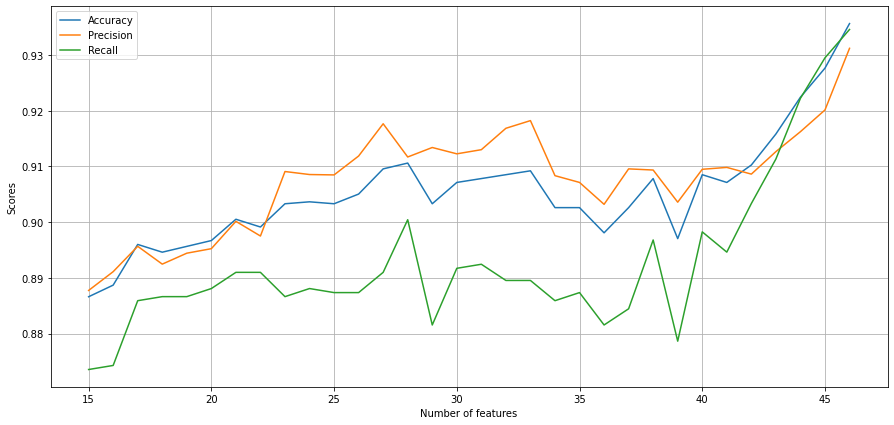

In [60]:
plt.figure(figsize = (15,7))
sns.lineplot(df_score['Feature Count'] , df_score['Accuracy'] , label = 'Accuracy')
sns.lineplot(df_score['Feature Count'] , df_score['Precision'] , label = 'Precision')
sns.lineplot(df_score['Feature Count'] , df_score['Recall'] , label = 'Recall')
plt.xlabel("Number of features")
plt.ylabel("Scores")
plt.grid()
plt.legend()
plt.show()

In [61]:
df_score.sort_values(by='Recall' , ascending=False)

,Feature Count,Accuracy,Precision,Recall
31,46,0.935652,0.931209,0.934593
30,45,0.927652,0.920144,0.929506
29,44,0.922435,0.916245,0.922238
28,43,0.915826,0.912664,0.911337
27,42,0.910261,0.908626,0.903343
13,28,0.910609,0.911700,0.900436
25,40,0.908522,0.909492,0.898256
23,38,0.907826,0.909359,0.896802
26,41,0.907130,0.909830,0.894622
16,31,0.907826,0.913011,0.892442


- Take top 28 features for model building.

In [62]:
## Top 28 Selected features for model building
features_list[:28]

['FrequentDomainNameMismatch',
 'PctNullSelfRedirectHyperlinks',
 'InsecureForms',
 'NumDots',
 'PctExtHyperlinks',
 'NumSensitiveWords',
 'PathLevel',
 'UrlLengthRT',
 'AbnormalExtFormActionR',
 'HostnameLength',
 'EmbeddedBrandName',
 'IpAddress',
 'NumDashInHostname',
 'MissingTitle',
 'ExtMetaScriptLinkRT',
 'TildeSymbol',
 'ExtFavicon',
 'DomainInSubdomains',
 'NumHash',
 'RightClickDisabled',
 'PctExtResourceUrlsRT',
 'DoubleSlashInPath',
 'SubdomainLevel',
 'ImagesOnlyInForm',
 'FakeLinkInStatusBar',
 'PctExtResourceUrls',
 'NumNumericChars',
 'AtSymbol']

In [65]:
x = df[features_list[:28]]
y = df['CLASS_LABEL']

In [66]:
x_train , x_test , y_train , y_test = train_test_split(x,y ,test_size=0.3, random_state=42)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [85]:
def Model_Evaluation(model , x_train , x_test , y_train , y_test):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accur = accuracy_score(y_test , y_pred)
    prec = precision_score(y_test , y_pred)
    recal = recall_score(y_test , y_pred)
    
    return accur,prec,recal



def BestModel(models , x_train , x_test , y_train , y_test):
    model_name = []
    accu_score = []
    prec_score = []
    recal_score = []

    for model in models:
        accur,prec,recal = Model_Evaluation(models[model] , x_train , x_test , y_train , y_test)
        accu_score.append(accur)
        prec_score.append(prec)
        recal_score.append(recal)
        model_name.append(model)


    data = {"Models" : model_name , "Accuracy" : accu_score , "Precision" : prec_score, "Recall" : recal_score}
    df_scores = pd.DataFrame(data)
    model = df_scores.sort_values(by="Recall" , ascending=False).iloc[0]
    best_model = model[0]
    best_score = {"Accuracy" : model[1],"Precision" : model[2],"Recall" : model[3],}
    
    return best_model , best_score

In [86]:
models = {"LogisticRegression" : LogisticRegression(),
         "DecisionTreeClassifier" : DecisionTreeClassifier(),
         "SVC" : SVC(),
         "RandomForestClassifier" : RandomForestClassifier()}

In [87]:
best_model , best_score = BestModel(models , x_train , x_test , y_train , y_test)

In [88]:
best_model , best_score

('RandomForestClassifier',
 {'Accuracy': 0.9791304347826087,
  'Precision': 0.9816983894582724,
  'Recall': 0.9745639534883721})

In [92]:
final_model = models[best_model]

In [93]:
final_model

RandomForestClassifier()

In [94]:
final_model.fit(x_train , y_train)

RandomForestClassifier()

In [89]:
import pickle

In [95]:
import os

In [98]:
os.makedirs("artifacts",exist_ok=True)

In [104]:
with open("artifacts/model.pkl",'wb') as file:
    pickle.dump(final_model,file)

In [1]:
pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip
